# Challenge
The idea behind this challenge is for you to explore the dataset, build a prediction model from it and then code a Python module that serves the model. Therefore there will be two main parts:

1. Your Jupyter (IPython) notebook containing all your experiments, analyzes, and results. In this notebook, you will perform all your visualizations, data normalizations, training and evaluation of your model.
2. A complete Python module ready to be used containing the model you trained. This module should be coded as if the engineering team would use it so it must contain usage instructions and a clear interface (generally speaking) to access your model.

## The dataset
Kickstarter is one of the main online crowdfunding platforms in the world. The dataset provided contains more de 300,000 projects launched on the platform in 2018. In the `data.csv` file there are the following columns:

- **ID**: internal ID, _numeric_
- **name**: name of the project, _string_
- **category**: project's category, _string_
- **main_category**: campaign's category, _string_
- **currency**: project's currency, _string_
- **deadline**: project's deadline date, _timestamp_
- **goal**: fundraising goal, _numeric_
- **launched**: project's start date, _timestamp_
- **pledged**: amount pledged by backers (project's currency), _numeric_
- **state**: project's current state, _string_; **this is what you have to predict**
- **backers**: amount of poeple that backed the project, _numeric_
- **country**: project's country, _string_
- **usd pledged**: amount pledged by backers converted to USD (conversion made by KS), _numeric_
- **usd_pledged_real**: amount pledged by backers converted to USD (conversion made by fixer.io api), _numeric_
- **usd_goal_real**: fundraising goal is USD, _numeric_

## Goal
Your goal is to predict whether a project will be successful or not. It is entirely up to you which features you will use and which model. When it comes to performance metrics you should be able to say when the model is good enough. There are no minimum requirements or tricky conditions. What we are trying to evaluate is how you handle an unknown dataset in a classification task and your ability to deliver the results.

## Deliverables
Do not use this notebook for your submission. The expected outputs are:

1. A Jupyter (IPython) notebook (that you have to create) containing your work and explanations. This is where you will put all your experiments, notes, visualizations and transformations in the data. This is also where you will prepare your data and train your prediction model.
2. A Python module containing your model and functions to use to predict Kickstarter projects' state. Assume that in order to review your work an engineer will import this module and try to make some predictions so your model should be in it.
3. A Markdown file containing usage instructions for your Python module. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv("data.csv")
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

Assuming Name and ID doesn't represent the state of the project. Hence Dropping the features

In [3]:
df = df.drop(["ID","name"],axis=1)

Checking for Missing Values in the data

In [4]:
df.isna().sum()

category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
null_df = df[df["usd pledged"].isnull()]

In [6]:
null_df.head()

category main_category currency    deadline    goal  \
169  Film & Video  Film & Video      USD  2014-09-20  6500.0   
328         Music         Music      AUD  2015-08-25  4500.0   
632         Music         Music      USD  2015-04-09  3500.0   
647         Music         Music      USD  2015-11-26  6000.0   
749         Music         Music      USD  2016-03-21  3000.0   

                launched  pledged      state  backers country  usd pledged  \
169  2014-08-06 21:28:36   555.00  undefined        0    N,0"          NaN   
328  2015-08-04 12:05:17  4767.00  undefined        0    N,0"          NaN   
632  2015-03-10 20:06:13  3576.00  undefined        0    N,0"          NaN   
647  2015-11-02 22:09:19  7007.80  undefined        0    N,0"          NaN   
749  2016-02-23 03:09:49  3660.38  undefined        0    N,0"          NaN   

     usd_pledged_real  usd_goal_real  
169            555.00        6500.00  
328           3402.08        3211.53  
632           3576.00        3500.00  
647           7007.80        6000.00  
749           3660.38        3000.00

The data for the missing values is weird for the features as well mainly "Country" and "state". Let's understand the percentage of this weird data in this null data.

In [7]:
pd.unique(null_df["country"])

array(['N,0"'], dtype=object)

In [8]:
pd.unique(null_df["state"])

array(['undefined', 'successful', 'canceled', 'failed', 'suspended', 'live'], dtype=object)

In [9]:
sum(null_df["state"].apply(lambda x:x=="undefined"))

3562

The Country "N,0" comprises of 100% of the null data and the majority of the state data is undefined for this null values. Hence, it is a good move to drop all the null values from the dataframe.

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)

Post Dropping Null Values

In [11]:
df.isna().sum()

category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

(array([  38757.,       0.,  197614.,       0.,       0.,    2798.,
              0.,  133851.,       0.,    1844.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

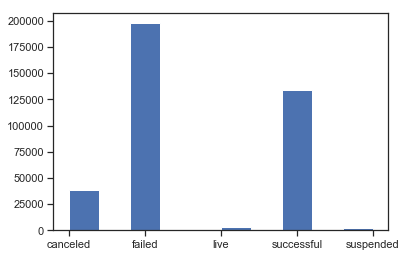

In [12]:
plt.hist(df["state"])

In [13]:
df["state"].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

### Next Steps..

1. Understand Category and main_category - try to unify them.
2. deadline and launched are two date specifc features involved, unify them to a new feature called duration.
3. Convert the categorical to onehot-encoding or feature hashing.
4. Normalize continous values.

In [14]:
print("Length of Category is {} and main_category is {}".format(len(pd.unique(df["category"])),len(pd.unique(df["main_category"]))))

Length of Category is 159 and main_category is 15


In [15]:
def convert_to_duration(launched,deadline):
    duration = pd.to_datetime(deadline) - pd.to_datetime(launched)
    duration = duration.apply(lambda d: 24*d.components[0]+d.components[1])
    return duration

In [16]:
df["duration"] = convert_to_duration(df["launched"],df["deadline"])
df = df.drop(["launched","deadline"],axis=1)
df.head()

category main_category currency     goal  pledged     state  backers  \
0          Poetry    Publishing      GBP   1000.0      0.0    failed        0   
1  Narrative Film  Film & Video      USD  30000.0   2421.0    failed       15   
2  Narrative Film  Film & Video      USD  45000.0    220.0    failed        3   
3           Music         Music      USD   5000.0      1.0    failed        1   
4    Film & Video  Film & Video      USD  19500.0   1283.0  canceled       14   

  country  usd pledged  usd_pledged_real  usd_goal_real  duration  
0      GB          0.0               0.0        1533.95      1403  
1      US        100.0            2421.0       30000.00      1435  
2      US        220.0             220.0       45000.00      1079  
3      US          1.0               1.0        5000.00       716  
4      US       1283.0            1283.0       19500.00      1335

In [17]:
# still see any duration values with 0 hours.

len(df[df["duration"] == 0])

2

In [18]:
# dropping 0 value durations
df= df[df["duration"] != 0].reset_index(drop=True)

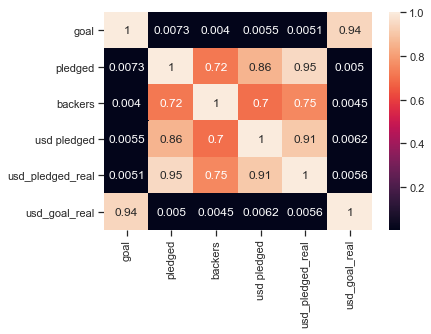

In [19]:
# Understanding the correlation heatmap for the continous variables

sns.heatmap(df.drop(["duration"],axis=True).corr(),annot=True)

In [20]:
df.describe()

goal       pledged        backers   usd pledged  \
count  3.748620e+05  3.748620e+05  374862.000000  3.748620e+05   
mean   4.952336e+04  9.750488e+03     106.687824  7.036766e+03   
std    1.189358e+06  9.601068e+04     911.707722  7.863995e+04   
min    1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    2.000000e+03  3.100000e+01       2.000000  1.698000e+01   
50%    5.500000e+03  6.200000e+02      12.000000  3.947500e+02   
75%    1.650000e+04  4.080000e+03      57.000000  3.034270e+03   
max    1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real       duration  
count      3.748620e+05   3.748620e+05  374862.000000  
mean       9.120852e+03   4.586342e+04     813.856035  
std        9.131945e+04   1.158764e+06    1589.668162  
min        0.000000e+00   1.000000e-02       1.000000  
25%        3.100000e+01   2.000000e+03     698.000000  
50%        6.244650e+02   5.500000e+03     712.000000  
75%        4.050845e+03   1.600000e+04     881.000000  
max        2.033899e+07   1.663614e+08  401735.000000

In [21]:
# dropping unwanted columns as most of them are highly correlated to the other column.

df = df.drop(["goal","pledged","backers","usd pledged"],axis=1)
df.columns

Index(['category', 'main_category', 'currency', 'state', 'country',
       'usd_pledged_real', 'usd_goal_real', 'duration'],
      dtype='object')

### Visualize Feature Distribution

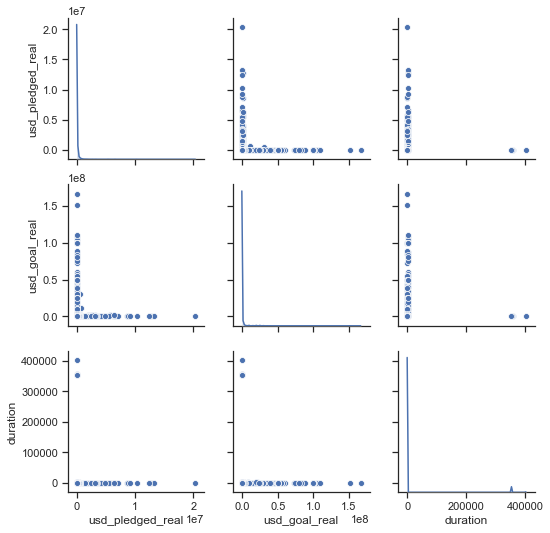

In [22]:
sns.pairplot(df.drop(["category","main_category","currency"],axis=1),diag_kind="kde")

In [23]:
len(df[(df["usd_pledged_real"] == 0)])

51808

In [24]:
df[df["usd_pledged_real"]== 0]["state"].value_counts()

failed       38633
canceled     12013
suspended      614
live           548
Name: state, dtype: int64

In [25]:
df = df[df["usd_pledged_real"]!= 0]

### Log Transformation

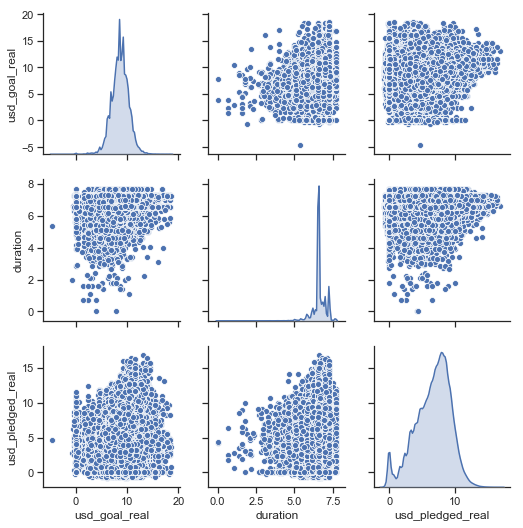

In [26]:
log_df = np.log(df[["usd_goal_real","duration","usd_pledged_real"]])
sns.pairplot(log_df,diag_kind="kde")

In [27]:
# For each feature find the data points with extreme high or low values

def findOutliers(outlier_count,max_count):
    outlierList = []
    for i in outlier_count:
        if outlier_count[i] > max_count:
            outlierList.append(i)
    return outlierList

def countOutliers(log_df):
    outlier_count = {}
    for feature in log_df.keys():
        
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_df[feature],q=25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_df[feature],q=75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5*(Q3-Q1)

        if(len(outlier_count)==0):
            for outlier in df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))].index:
                outlier_count[outlier] = 1
        else:
            for outlier in log_df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))].index:
                if outlier in outlier_count:
                    outlier_count[outlier] = outlier_count[outlier]+1
                else:
                    outlier_count[outlier] = 1
    return outlier_count


outlier_count = countOutliers(log_df)
outliers = findOutliers(outlier_count,1)

print("Outlier count is {}".format(len(outliers)))

Outlier count is 2159


In [28]:
df[["usd_pledged_real","usd_goal_real","duration"]] = log_df
df.head()

category main_category currency       state country  \
1  Narrative Film  Film & Video      USD      failed      US   
2  Narrative Film  Film & Video      USD      failed      US   
3           Music         Music      USD      failed      US   
4    Film & Video  Film & Video      USD    canceled      US   
5     Restaurants          Food      USD  successful      US   

   usd_pledged_real  usd_goal_real   duration  
1         10.308953       7.268920   7.791936  
2         10.714418       6.983790   5.393628  
3          8.517193       6.573680   0.000000  
4          9.878170       7.196687   7.156956  
5         10.819778       6.716595  10.866185

In [49]:
print(len(df))
df = df.drop(outliers).reset_index(drop=True)
print(len(df))

323054
320895
